In [1]:
import numpy as np
import pandas as pd

In [2]:
content = pd.read_csv('Inflasi - Inflasi.csv')

In [3]:
content.head(15)

,Month,Inflasi
0,Juni 2019,3.28%
1,Mei 2019,3.32%
2,April 2019,2.83%
3,Maret 2019,2.48%
4,Februari 2019,2.57%
5,Januari 2019,2.82%
6,Desember 2018,3.13%
7,Nopember 2018,3.23%
8,Oktober 2018,3.16%
9,September 2018,2.88%


In [4]:
content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 2 columns):
Month      199 non-null object
Inflasi    199 non-null object
dtypes: object(2)
memory usage: 3.2+ KB


In [5]:
content['Inflasi'] = content.Inflasi.str.replace('%','').astype(float) # trim '%' agar object bisa cast to float

In [6]:
content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 2 columns):
Month      199 non-null object
Inflasi    199 non-null float64
dtypes: float64(1), object(1)
memory usage: 3.2+ KB


In [7]:
content.head(7)

,Month,Inflasi
0,Juni 2019,3.28
1,Mei 2019,3.32
2,April 2019,2.83
3,Maret 2019,2.48
4,Februari 2019,2.57
5,Januari 2019,2.82
6,Desember 2018,3.13


In [8]:
df = pd.DataFrame(content)
df.describe()

,Inflasi
count,199.000000
mean,6.314724
std,3.316154
min,0.000000
25%,3.855000
50%,6.040000
75%,7.285000
max,18.380000


In [9]:
import matplotlib.pyplot as plt

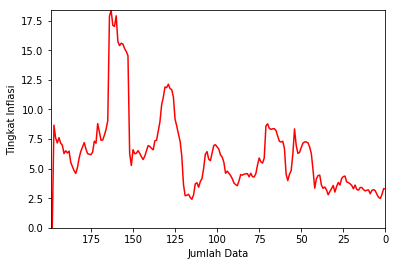

In [12]:
inflasi = df['Inflasi']
plt.ylim(df['Inflasi'].min(),df['Inflasi'].max())
plt.xlim(df['Inflasi'].count(), 0) # dibalik agar data bisa dibaca dr 2003 -> 2019
plt.plot(df['Inflasi'], color='red') 
plt.xlabel('Jumlah Data')
plt.ylabel('Tingkat Inflasi')
plt.savefig('line-chart.png')
plt.show()

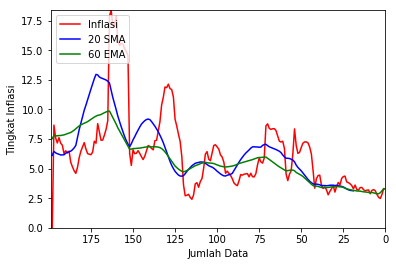

In [13]:
inflasi = df['Inflasi']
plt.ylim(df['Inflasi'].min(),df['Inflasi'].max())
plt.xlim(df['Inflasi'].count(), 0) # dibalik agar data bisa dibaca 2003 - 2019
sma_20 = df['Inflasi'].rolling(window=20).mean() #dataframe.rolling() => window calculation
ema_60 = df['Inflasi'].ewm(span=60).mean()  # dataframe.ewm() => exponential weighted 

plt.plot(inflasi, color='red') 
plt.plot(sma_20, label='20 SMA', color='blue') # Simple Moving Average
plt.plot(ema_60, label='60 EMA', color='green') # Exponential Moving Average
plt.xlabel('Jumlah Data')
plt.ylabel('Tingkat Inflasi')
plt.legend(loc='upper left')
plt.savefig('completeChart.png')
plt.show()